In [3]:
MY_SECRET_KEY="ggrdn7Mwg0sUw3xto6k4"

In [22]:
!pip install ultralytics
!pip install roboflow

In [4]:
import ultralytics
from roboflow import Roboflow
from ultralytics import YOLO
from IPython.display import Image


In [6]:

rf = Roboflow(api_key="ggrdn7Mwg0sUw3xto6k4")
project = rf.workspace("-jwzpw").project("continuous_fire")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [4]:
!pip install -U ultralytics

In [8]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/continuous_fire-6/data.yaml epochs=100 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/continuous_fire-6/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment

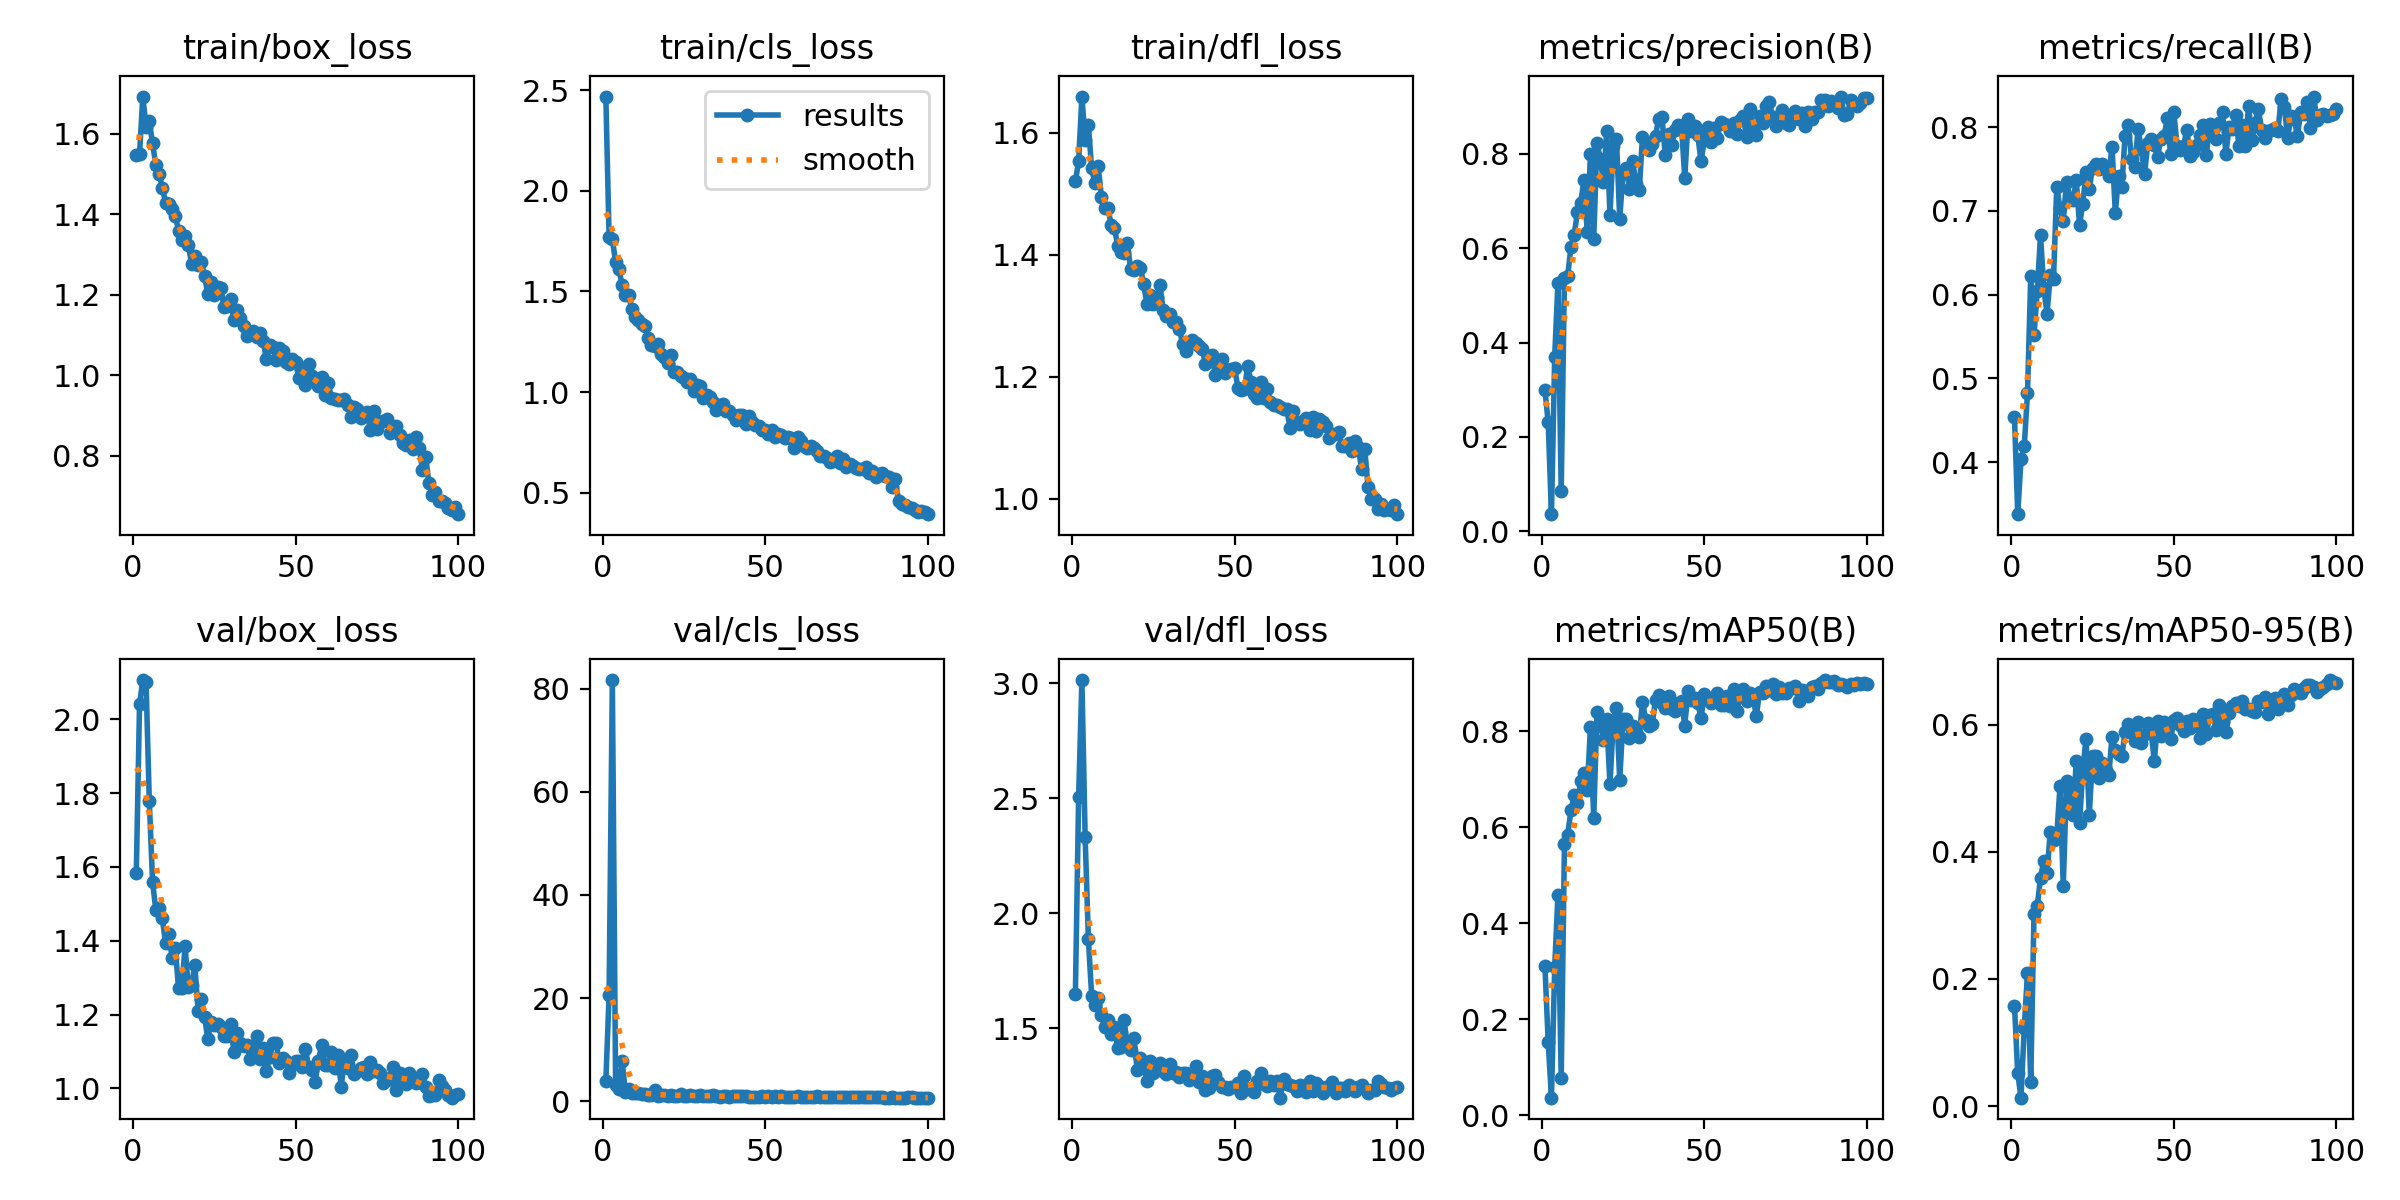

In [9]:
# VIEW MODEL TRANING CHARTS
Image(filename=f'/content/runs/detect/train9/results.png', width=600)

In [10]:
# VALIDATION
!yolo task=detect mode=val model=/content/runs/detect/train9/weights/best.pt data=/content/continuous_fire-6/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100% 754/754 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [00:11<00:00,  4.16it/s]
                   all        754        950      0.908      0.816      0.899       0.67
Speed: 0.5ms preprocess, 8.6ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val
